# Homework 1 (Due Tuesday, March 30th, 2021 at 6:29pm PST)

Every day late is -10%.

You are a business analyst working for a major US toy retailer:

* A manager in the marketing department wants to find out the most frequently used words in positive reviews (five stars) and negative reviews (one star) in order to determine what occasion the toys are purchased for (Christmas, birthdays, and anniversaries.). He would like your opinion on **which gift occasions (Christmas, birthdays, or anniversaries) tend to have the most positive reviews** to focus marketing budget on those days.

* There are malformed characters in the review text. For instance, notice the `&#34;` - these are examples of incorrectly decoded [HTML encodings](https://krypted.com/utilities/html-encoding-reference/).
```
"amazing quality first of all, these cards are amazing proxies (but don't try to use em in &#34;official duels&#34; unless a judge is okay with it, if you have the real thing to show) and look amazing in your binder!"
```
Please clean up all instances of these incorrect decodings.

* One of your product managers suspects that **toys purchased for male recipients (husbands, sons, etc.)** tend to be much more likely to be reviewed poorly. She would like to see some data points confirming or rejecting her hypothesis. 

* Use **regular expressions to parse out all references to recipients and gift occassions**, and account for the possibility that people may spell words "son" / "children" / "Christmas" as both singular and plural, upper or lower-cased.

* Explain what some of **pitfalls/limitations** are of using only a word count analysis to make these inferences. What additional research/steps would you need to do to verify your conclusions?

* **Create a simple text file that contains 2-3 lines at most describing yourself, your background, and interests. It must contain at least 1 emoji and 4-5 international characters (non-ASCII)**. Make sure to properly encode the file so that I can open it in `UTF-8` to read. I must be able to read all characters properly. Attach it to your submission.

Perform the same word count analysis using the reviews received from Amazon to answer your marketing manager's question. They are stored in two files, (`poor_amazon_toy_reviews.txt`) and (`good-amazon-toy-reviews.txt`). **Provide a few sentences with your findings and business recommendations.** Make any assumptions you'd like to- this is a fictitious company after all. I just want you to get into the habit of "finishing" your analysis: to avoid delivering technical numbers to a non-technical manager.

**Submit everything as a new notebook and Slack direct message to me (Yu Chen) and the TA the HW as an attachment.**

**NOTE**: Name the notebook `lastname_firstname_HW1.ipynb`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [34]:
with open("poor_amazon_toy_reviews.txt",'r', encoding="utf8") as fh:
     amz_poor_reviews = fh.readlines()

In [35]:
with open("good_amazon_toy_reviews.txt",'r', encoding="utf8") as fh:
     amz_good_reviews = fh.readlines()

In [36]:
print(f"Num poor reviews: {len(amz_poor_reviews)} \nNum good reviews: {len(amz_good_reviews)}")

Num poor reviews: 12700 
Num good reviews: 102217


In [37]:
# Make all lowercase
amz_poor_reviews = [x.lower() for x in amz_poor_reviews]
amz_good_reviews = [x.lower() for x in amz_good_reviews]

* There are malformed characters in the review text. For instance, notice the `&#34;` - these are examples of incorrectly decoded [HTML encodings](https://krypted.com/utilities/html-encoding-reference/).
```
"amazing quality first of all, these cards are amazing proxies (but don't try to use em in &#34;official duels&#34; unless a judge is okay with it, if you have the real thing to show) and look amazing in your binder!"
```
Please clean up all instances of these incorrect decodings.

In [44]:
a, b = 0, 0

# remove newline and decoded HTML encoding
for i in range(len(amz_poor_reviews)):
    if re.search('[\b]*<br>[\b]*', amz_poor_reviews[i]):
        a += 1
    
for i in range(len(amz_good_reviews)):
    if re.search('[\b]*<br>[\b]*', amz_good_reviews[i]):
        b += 1
        
print(a, b)

0 0


No Linebreak

In [45]:
# remove newline and decoded HTML encoding
for i in range(len(amz_poor_reviews)):
    amz_poor_reviews[i] = re.sub('\n', '', amz_poor_reviews[i])
    amz_poor_reviews[i] = re.sub('[\b]*&#\d+[\b]*;', '', amz_poor_reviews[i])
    
for i in range(len(amz_good_reviews)):
    amz_good_reviews[i] = re.sub('\n', '', amz_good_reviews[i])
    amz_good_reviews[i] = re.sub('[\b]*&#\d+[\b]*;', '', amz_good_reviews[i])    

In [46]:
# Good reviews

amz_good_reviews_df = pd.DataFrame(amz_good_reviews, columns=["reviews"])

# Find occasions
amz_good_reviews_df["occasions"] = amz_good_reviews_df["reviews"].str.findall(r"(birthday)s?|(anniversar)\w+|(christmas)\w*")

# Find Male Recepient
amz_good_reviews_df["m_recepient"] = amz_good_reviews_df["reviews"].str.findall(r"(sons?|boys?|grand(sons|pas?|pops?|fathers?)|fathers?|dad(dy)?|uncles?|brothers?|males?|husbands?)")

# Find Female Recepient
amz_good_reviews_df["f_recepient"] = amz_good_reviews_df["reviews"].str.findall(r"(daughters?|girls?|grand(daughters|mas?|moms?|mothers?)|mothers?|mom(my)?|aunts?|sisters?|females?|wi(fe|ves))")

# Find toys
amz_good_reviews_df["toys"] = amz_good_reviews_df["reviews"].str.findall(r"[\b]*(toy)s?[\b]*")

# Clean recepients
amz_good_reviews_df["m_recepient"] = amz_good_reviews_df["m_recepient"].apply(lambda x: "Male" if len(x) != 0 else '')
amz_good_reviews_df["f_recepient"] = amz_good_reviews_df["f_recepient"].apply(lambda x: "Female" if len(x) != 0 else '')

# amz_good_reviews_df["m_recepient"] = np.where(amz_good_reviews_df["m_recepient"] == "Male", amz_good_reviews_df["m_recepient"], "")
# amz_good_reviews_df["f_recepient"] = np.where(amz_good_reviews_df["f_recepient"] == "Female", amz_good_reviews_df["f_recepient"], "")

amz_good_reviews_df["recepient"] = amz_good_reviews_df["m_recepient"]+amz_good_reviews_df["f_recepient"]

# Clean occassions
# amz_good_reviews_df = amz_good_reviews_df[amz_good_reviews_df["occasions"].apply(lambda x: len(x) != 0)].reset_index(drop=True)
# amz_good_reviews_df["occasions"] = amz_good_reviews_df["occasions"].apply(lambda x: ''.join(x[0]))
amz_good_reviews_df["occasions"] = amz_good_reviews_df["occasions"].apply(lambda x: ''.join(x[0]) if len(x) != 0 else '')

# Clean toys
amz_good_reviews_df["toys"] = amz_good_reviews_df["toys"].apply(lambda x: ''.join(set(x)))

In [47]:
# Poor reviews

amz_poor_reviews_df = pd.DataFrame(amz_poor_reviews, columns=["reviews"])

# Find occasions
amz_poor_reviews_df["occasions"] = amz_poor_reviews_df["reviews"].str.findall(r"(birthday)s?|(anniversar)\w+|(christmas)\w*")

# Find Male Recepient
amz_poor_reviews_df["m_recepient"] = amz_poor_reviews_df["reviews"].str.findall(r"(sons?|boys?|grand(sons|pas?|pops?|fathers?)|fathers?|dad(dy)?|uncles?|brothers?|males?|husbands?)")

# Find Female Recepient
amz_poor_reviews_df["f_recepient"] = amz_poor_reviews_df["reviews"].str.findall(r"(daughters?|girls?|grand(daughters|mas?|moms?|mothers?)|mothers?|mom(my)?|aunts?|sisters?|females?|wi(fe|ves))")

# Find toys
amz_poor_reviews_df["toys"] = amz_poor_reviews_df["reviews"].str.findall(r"[\b]*(toy)s?[\b]*")

# Clean recepients
amz_poor_reviews_df["m_recepient"] = amz_poor_reviews_df["m_recepient"].apply(lambda x: "Male" if len(x) != 0 else '')
amz_poor_reviews_df["f_recepient"] = amz_poor_reviews_df["f_recepient"].apply(lambda x: "Female" if len(x) != 0 else '')

# amz_poor_reviews_df["m_recepient"] = np.where(amz_poor_reviews_df["m_recepient"] == "Male", amz_poor_reviews_df["m_recepient"], "")
# amz_poor_reviews_df["f_recepient"] = np.where(amz_poor_reviews_df["f_recepient"] == "Female", amz_poor_reviews_df["f_recepient"], "")

amz_poor_reviews_df["recepient"] = amz_poor_reviews_df["m_recepient"]+amz_poor_reviews_df["f_recepient"]

# Clean occassions
# amz_poor_reviews_df = amz_poor_reviews_df[amz_poor_reviews_df["occasions"].apply(lambda x: len(x) != 0)].reset_index(drop=True)
# amz_poor_reviews_df["occasions"] = amz_poor_reviews_df["occasions"].apply(lambda x: ''.join(x[0]))
amz_poor_reviews_df["occasions"] = amz_poor_reviews_df["occasions"].apply(lambda x: ''.join(x[0]) if len(x) != 0 else '')

# Clean toys
amz_poor_reviews_df["toys"] = amz_poor_reviews_df["toys"].apply(lambda x: ''.join(set(x)))

* A manager in the marketing department wants to find out the most frequently used words in positive reviews (five stars) and negative reviews (one star) in order to determine what occasion the toys are purchased for (Christmas, birthdays, and anniversaries.). He would like your opinion on **which gift occasions (Christmas, birthdays, or anniversaries) tend to have the most positive reviews** to focus marketing budget on those days.

In [48]:
amz_good_occ = amz_good_reviews_df.groupby("occasions")[["reviews"]].count()
amz_good_occ = amz_good_occ.rename(index={"anniversar":"anniversary"}).reset_index().drop(0)
amz_good_occ

,occasions,reviews
1,anniversary,51
2,birthday,3778
3,christmas,1075


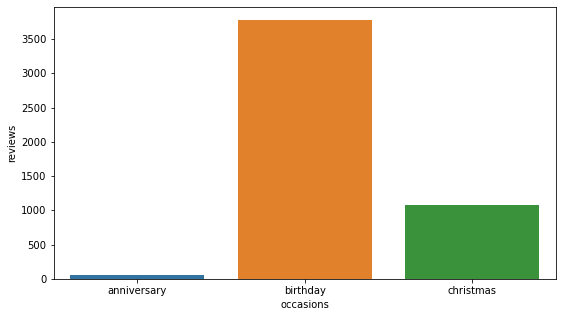

In [49]:
fig, ax = plt.subplots(figsize=(9,5))

sns.barplot(data=amz_good_occ, x="occasions", y="reviews", ax=ax);

**I assumed that all reviews are about the toy product regardless they include the word toy**

Between three occasions of Christmas, Birthday, and Anniversary, Birthday tend to have the most positive reviews. \
The inferred reasons for the phenomenon are the followings:

1. The gift is most suitable for birthdays
2. Birthdays can be anyday in a year, but christmas is one day
3. Given the product is a toy, it was a gift for mostly children rather than adults. That is why anniversay has a low occurrence even though it can also be any day in a year.

* One of your product managers suspects that **toys purchased for male recipients (husbands, sons, etc.)** tend to be much more likely to be reviewed poorly. She would like to see some data points confirming or rejecting her hypothesis. 

In [100]:
# Reviews that contain word toy
# amz_toys_good = amz_good_reviews_df[amz_good_reviews_df["toys"] != '']

amz_toys_good = amz_good_reviews_df.groupby("recepient")[["reviews"]].count()
amz_toys_good.rename(columns={"reviews":"good reviews"}, inplace=True)

amz_toys_poor = amz_poor_reviews_df.groupby("recepient")[["reviews"]].count()
amz_toys_poor.rename(columns={"reviews":"bad reviews"}, inplace=True)

In [101]:
pd.concat([amz_toys_good, amz_toys_poor], axis=1).iloc[1:3]

,good reviews,bad reviews
recepient,,
Female,11589,623
Male,13969,1107


In [102]:
# Reviews that contain word toy
# amz_toys_poor = amz_poor_reviews_df[amz_poor_reviews_df["toys"] != '']

amz_toys_good = amz_toys_good.iloc[1:3]
amz_toys_good = amz_toys_good.div(amz_toys_good.sum(axis=0), axis=1)
amz_toys_good.rename(columns={"reviews":"good reviews"}, inplace=True)

# Drop reviews with no male/female or both male/female
amz_toys_poor = amz_toys_poor.iloc[1:3]
amz_toys_poor = amz_toys_poor.div(amz_toys_poor.sum(axis=0), axis=1)
amz_toys_poor.rename(columns={"reviews":"bad reviews"}, inplace=True)

In [103]:
pd.concat([amz_toys_good, amz_toys_poor], axis=1)

,good reviews,bad reviews
recepient,,
Female,0.453439,0.360116
Male,0.546561,0.639884


Among the recepients that I was able to identify and parse, Male recepients had more bad reviews than female recepients. I also analyzed whether male recepients tend to have more poor reviews than good reviews. Since the number of good and poor reviews differ in large magnitude, I converted it to the percentage of reviews by male and female recepients respectively. As shown above, male recepients tend to have more bad reviews while female recepients have more good reviews.

* Use **regular expressions to parse out all references to recipients and gift occassions**, and account for the possibility that people may spell words "son" / "children" / "Christmas" as both singular and plural, upper or lower-cased.

Explain what some of pitfalls/limitations are of using only a word count analysis to make these inferences. What additional research/steps would you need to do to verify your conclusions?

- Have to manually find variations of male/female recepients
- Ocassionally, both male and female words appear. It is not clear who is the recepient of the gift.

* **Create a simple text file that contains 2-3 lines at most describing yourself, your background, and interests. It must contain at least 1 emoji and 4-5 international characters (non-ASCII)**. Make sure to properly encode the file so that I can open it in `UTF-8` to read. I must be able to read all characters properly. Attach it to your submission.

In [111]:
with open("simple_text_non_ascii.txt",'r', encoding="utf8") as fh:
     intro = fh.readlines()

In [112]:
intro

['안녕하세요. 저는 조규태 입니다. 저는 현재 남가주대학교에서 석사과정을 하고 있고, 이 글은 자연어해석 수업의 일부로 적고 있는 글 입니다. 한국어 자연어 해석에 대해 배우고 싶습니다✌']

** Additional Experiment

In [18]:
from collections import Counter

def count_words(lines, delimiter=" "):
    
    words = Counter() # instantiate a Counter object called words
    for line in amz_poor_reviews:
        for word in line.split(delimiter):
            words[word] += 1 # increment count for word
    return words

In [19]:
amz_poor_dict = count_words(amz_poor_reviews)

In [20]:
amz_poor_df = pd.DataFrame.from_dict(amz_poor_dict, orient='index').reset_index().rename(columns={"index":"words", 0:"count"})
amz_poor_df.sort_values("count", ascending=False)

,words,count
15,the,21945
14,and,11191
121,it,10605
8,i,10232
63,to,9690
...,...,...
16059,"grader,",1
16058,soon!,1
16057,headrest,1
16053,"ask.""",1


In [42]:
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))

In [43]:
amz_poor_df[~amz_poor_df["words"].isin(nltk_stopwords)].sort_values("count", ascending=False)

,words,count
212,,7365
105,one,2175
178,would,1741
304,like,1493
156,get,1293
...,...,...
16058,soon!,1
16057,headrest,1
16053,"ask.""",1
16051,giveaways,1
